<a href="https://colab.research.google.com/github/gmezaarrepol/informacionCovid/blob/master/covid19_chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Graficos COVID-19 Chile
Gonzalo Meza Arrepol



In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


# Data conectada desde GitHub Ministerio de Ciencias

In [0]:
# conexion a data comuna diaria
url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv'
datamin = pd.read_csv(url, error_bad_lines=False)
datamin = datamin.fillna(0)
datamin.rename(columns = {'Fecha':'fechaDia'}, inplace = True)


#url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv'

#datamin = pd.read_csv(url, error_bad_lines=False)
#datamin = datamin.set_index('Fecha')
#datamin = datamin.fillna(0)
#datamin = datamin.T
#datamin = datamin.reset_index()
#datamin.rename(columns = {'index':'fechaDia'}, inplace = True)

In [125]:
datamin.head()

,fechaDia,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales
0,2020-03-03,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2020-03-04,2.0,3.0,0.0,0.0,3.0,0.0,2.0
2,2020-03-05,1.0,4.0,0.0,0.0,4.0,0.0,1.0
3,2020-03-06,1.0,5.0,0.0,0.0,5.0,0.0,1.0
4,2020-03-07,2.0,7.0,0.0,0.0,7.0,0.0,2.0


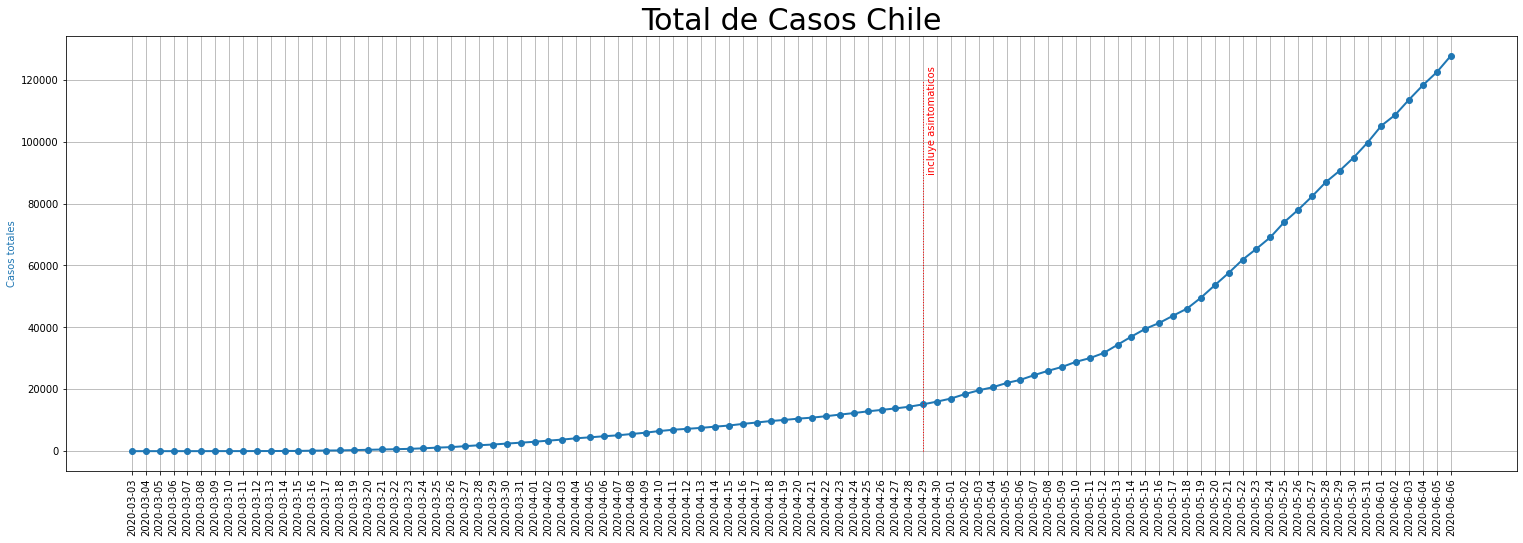

In [126]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales', color=color)
ax3.plot('fechaDia', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
plt.title('Total de Casos Chile', fontsize=30)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 120000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 30000), color = 'r', rotation=90)
plt.show()

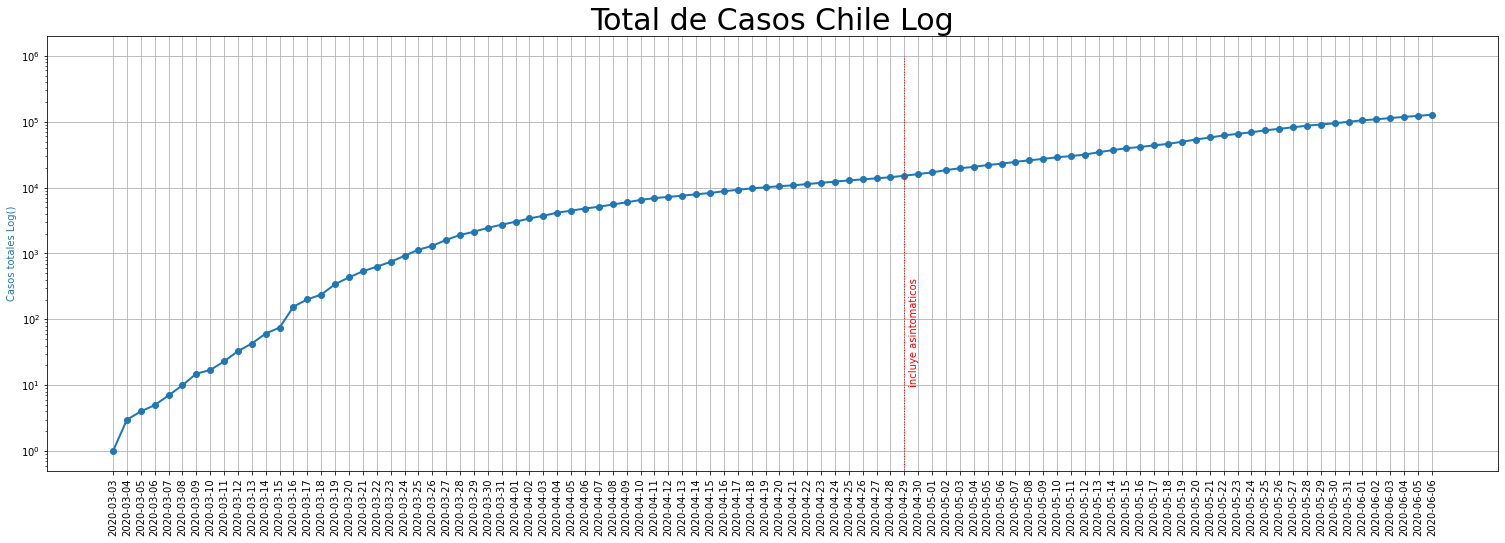

In [127]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:blue'
ax3.set_ylabel('Casos totales Log()', color=color)
ax3.plot('fechaDia', 'Casos totales', data=datamin ,color=color,linewidth=2.0, marker='o')
plt.title('Total de Casos Chile Log', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla
plt.yscale('log')

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 1000000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y1 + 10), color = 'r', rotation=90)
plt.show()

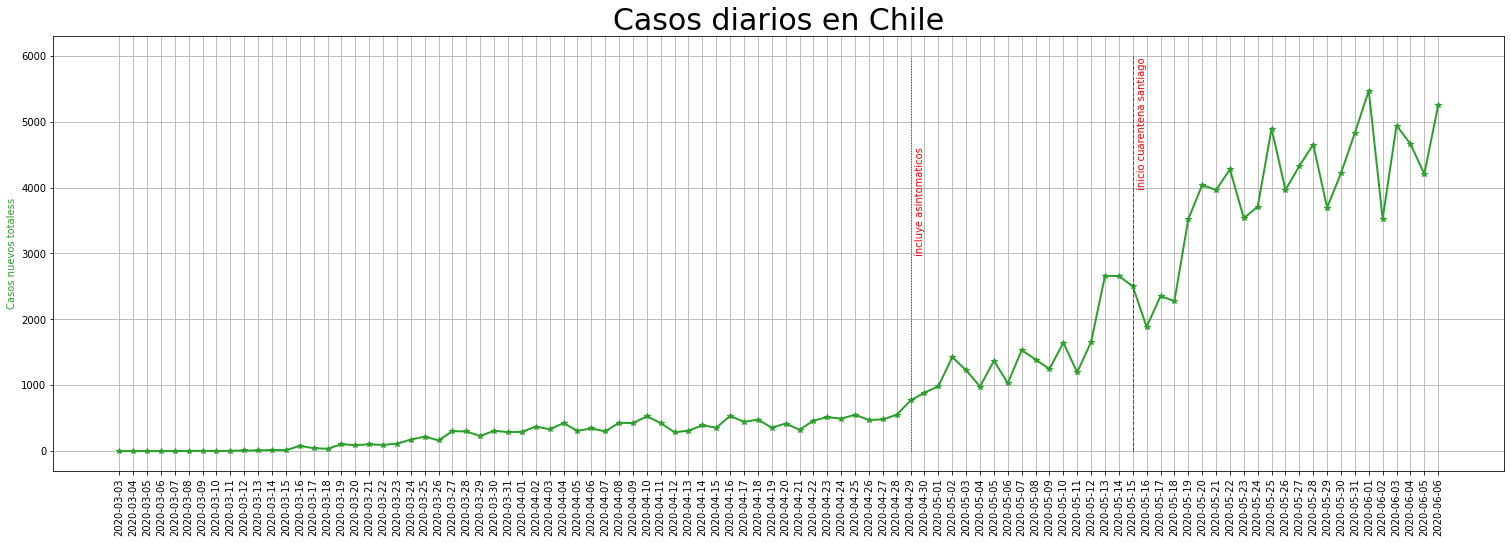

In [128]:
fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:green'
ax3.set_ylabel('Casos nuevos totaless', color=color)
ax3.plot('fechaDia', 'Casos nuevos totales', data=datamin ,color=color,linewidth=2.0, marker='*')
plt.title('Casos diarios en Chile', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# cambio en la metodologia de cuenta (se incluyen asintomaticos) 29/04
x1 = 57
x2 = 57
y1 = 0
y2 = 6000
plt.plot([x1, x2], [y1, y2], color='r', linestyle='dotted', linewidth=1)
ax3.annotate('incluye asintomaticos', xy=(x2, y2), xytext=(x2 + 0.3, y2 - 3000), color = 'r', rotation=90)

# inicio de la cuarentena en santiago viernes 15/05
x10 = 73
x20 = 73
y10 = 0
y20 = 6000
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('inicio cuarentena santiago', xy=(x2, y2), xytext=(x20 + 0.3, y20 - 2000), color = 'r', rotation=90)
plt.show()

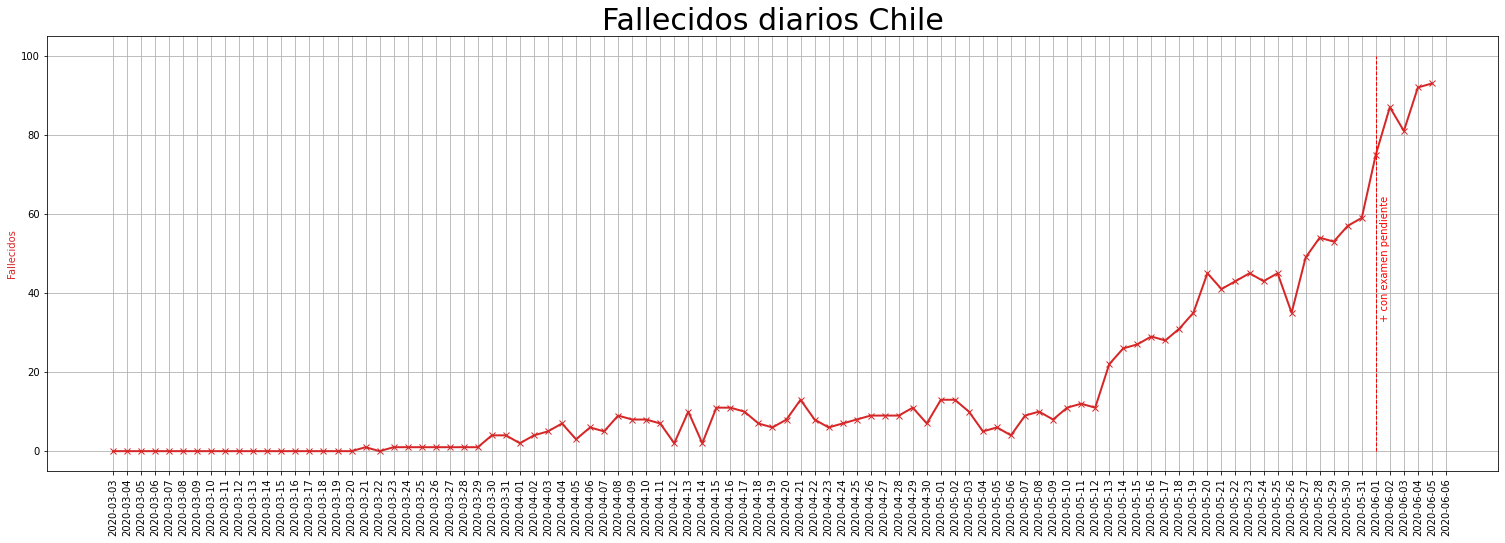

In [129]:
datamin['diaFallecidos'] = datamin['Fallecidos'].shift(-1) - datamin['Fallecidos'] 

fig, ax3 = plt.subplots(figsize=(26,8))

# define la primera variable a graficar
color = 'tab:red'
ax3.set_ylabel('Fallecidos', color=color)
ax3.plot('fechaDia', 'diaFallecidos', data=datamin ,color=color,linewidth=2.0, marker='x')
plt.title('Fallecidos diarios Chile', fontsize=30)
ax3.set_xticklabels(datamin['fechaDia'], rotation = 90)
ax3.xaxis.grid() # grilla 
ax3.yaxis.grid() # grilla

# a partir de la fecha 02/06 se suman aquellos que aun no estaban confirmados 
# inicio de la cuarentena en sanitago
x10 = 90
x20 = 90
y10 = 0
y20 = 100
plt.plot([x10, x20], [y10, y20], color='r', linestyle='--', linewidth=1)
ax3.annotate('+ con examen pendiente', xy=(x20, y20), xytext=(x20 + 0.3, y20/3), color = 'r', rotation=90)
plt.show()


# Analisis por Sector (R)

In [116]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#### carga de packages

In [117]:
%%R
install.packages("ggplot")
install.packages("tidyverse")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [0]:
%%R
library(ggplot2)
library(tidyverse)

# Analisis descriptivo

In [119]:
%%R
url2 <- 'https://raw.githubusercontent.com/gmezaarrepol/informacionCovid/master/data-covid19.csv'
data <- read.csv(url2, sep = ',')
str(data)


'data.frame':	1536 obs. of  8 variables:
 $ region           : Factor w/ 16 levels "Antofagasta",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fecha            : Factor w/ 96 levels "2020/03/03","2020/03/04",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ casos_acum       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ confirmados      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ total_cada_100mil: num  0 0 0 0 0 0 0 0 0 0 ...
 $ fallecidos_nuevos: int  0 0 0 0 0 0 0 0 0 0 ...
 $ fallecidos_acum  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ notificados_acum : int  NA NA NA NA NA NA NA NA NA NA ...


In [120]:
%%R
# agrupar los datos para el grafico 1
totales <- data %>%
  group_by(region)%>%
  summarize(total <- sum(confirmados))
totales

# A tibble: 16 x 2
   region             `total <- sum(confirmados)`
   <fct>                                    <int>
 1 Antofagasta                               3033
 2 Araucanía                                 2321
 3 Arica y Parinacota                         819
 4 Atacama                                    281
 5 Aysén                                       19
 6 Biobío                                    2490
 7 Coquimbo                                   898
 8 Los Lagos                                  985
 9 Los Ríos                                   400
10 Magallanes                                1081
11 Maule                                     1969
12 Metropolitana                           103194
13 Ñuble                                     1470
14 O’Higgins                                 1111
15 Tarapacá                                  3094
16 Valparaíso                                4580


In [121]:
%%R -w 1440 -h 480 -u px
regiones <- c('Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama', 
              'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 
              'Maule', 'Ñuble', 'Biobío', 'Araucanía', 'Los Rios', 
              'Los Lagos', 'Aysén', 'Magallanes')

ggplot(totales, aes(x = regiones, y = total, group = 1))+
  geom_col()

R[write to console]: Error in FUN(X[[i]], ...) : object 'total' not found
Calls: <Anonymous> ... <Anonymous> -> f -> scales_add_defaults -> lapply -> FUN

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: package ‘ggplot’ is not available (for R version 3.6.3) 



RRuntimeError: ignored